#Scraping Tweet

In [1]:
!pip3 install twint

     |████████████████████████████████| 1.2MB 13.3MB/s 
     |████████████████████████████████| 245kB 52.8MB/s 
     |████████████████████████████████| 92kB 12.6MB/s 
     |████████████████████████████████| 153kB 51.1MB/s 
     |████████████████████████████████| 256kB 52.2MB/s 
     |████████████████████████████████| 235kB 49.7MB/s 
  Created wheel for twint: filename=twint-2.1.19-cp36-none-any.whl size=33519 sha256=e1061981116ac5a45826c36dd139a982a160dd4c8735b6abfce8329825ebd375
  Stored in directory: /root/.cache/pip/wheels/cf/d1/88/bebb59d5991c3744d4aecda0a6491e6ec22259ea85eb6e9a31
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=a76f8c8b458325dc341d84faf2624dc90e6772486c379396db0e526aadb43ee8
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp36-none-any.whl size=15969 sha256=d6fa3a6938e1abdbc2eb4c73842363248f0

In [0]:
import twint as tw

In [26]:
c = tw.Config()
c.Username = "tirtoid"
c.Limit = 150
c.Store_csv = True
c.Output = "tirtoid.csv"
c.Format = "Tweet_id: {id} | Date: {date} | Time: {time} | Tweet: {tweet}"

tw.run.Search(c)

Tweet_id: 1253949363614711808 | Date: 2020-04-25 | Time: 07:30:00 | Tweet: Podcast dianggap bisa menghadirkan fleksibilitas dan dinamisnya gaya hidup anak muda. Selain itu, yang bikin ia tampak istimewa, menawarkan kedekatan personal lewat beragam tema spesifik sesuai selera. #ads  http://tirto.id/eRVs  pic.twitter.com/2qkXfYR3zg
Tweet_id: 1253944685300641792 | Date: 2020-04-25 | Time: 07:11:24 | Tweet: Menkopolhukam Mahfud MD menyampaikan rasa syukurnya setelah Ravio Patra dilepas oleh Polda Metro Jaya.  “Biasanya orang yang brutal itu kalau ingin menyembunyikan diri salah satunya dengan cara meretas [akun] punya orang." http://tirto.id/e2a3 
Tweet_id: 1253941815738109952 | Date: 2020-04-25 | Time: 07:00:00 | Tweet: Ajaran-ajaran kuno tentang kebijaksanaan kembali populer di tengah masa-masa sulit seperti pandemi. Taoisme dan stoikisme, anyone?   http://tirto.id/eKqC  pic.twitter.com/pihoB476ZB
Tweet_id: 1253932704279564289 | Date: 2020-04-25 | Time: 06:23:48 | Tweet: Belva Syah Devar

#Read Dataset

In [0]:
import pandas as pd

In [174]:
df_tirto = pd.read_csv('tirtoid.csv',sep=";",error_bad_lines=False)
df_tirto.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,category,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,"1,25395E+18","1,25395E+18","1,5878E+12",25/04/2020,07:30:00,UTC,4187275698,tirtoid,tirtoid,NaN,Podcast dianggap bisa menghadirkan fleksibilit...,sos,[],['http://tirto.id/eRVs'],['https://pbs.twimg.com/media/EWbPuR4U8AAkhN5....,0,4,13,['#ads'],[],https://twitter.com/TirtoID/status/12539493636...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '4187275698', 'username': 'TirtoI...",NaN,NaN,NaN,NaN
1,"1,25394E+18","1,25394E+18","1,5878E+12",25/04/2020,07:11:24,UTC,4187275698,tirtoid,tirtoid,NaN,Menkopolhukam Mahfud MD menyampaikan rasa syuk...,pol,[],['http://tirto.id/e2a3'],[],24,28,81,[],[],https://twitter.com/TirtoID/status/12539446853...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '4187275698', 'username': 'TirtoI...",NaN,NaN,NaN,NaN
2,"1,25394E+18","1,25394E+18","1,5878E+12",25/04/2020,07:00:00,UTC,4187275698,tirtoid,tirtoid,NaN,Ajaran-ajaran kuno tentang kebijaksanaan kemba...,sos,[],['http://tirto.id/eKqC'],['https://pbs.twimg.com/media/EWbPa6LUMAAGhcb....,6,31,95,[],[],https://twitter.com/TirtoID/status/12539418157...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '4187275698', 'username': 'TirtoI...",NaN,NaN,NaN,NaN
3,"1,25393E+18","1,25393E+18","1,5878E+12",25/04/2020,06:23:48,UTC,4187275698,tirtoid,tirtoid,NaN,"Belva Syah Devara, CEO Ruangguru, memang sudah...",pol,[],['http://tirto.id/eVig'],[],9,63,126,[],[],https://twitter.com/TirtoID/status/12539327042...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '4187275698', 'username': 'TirtoI...",NaN,NaN,NaN,NaN
4,"1,25391E+18","1,25391E+18","1,58779E+12",25/04/2020,05:00:00,UTC,4187275698,tirtoid,tirtoid,NaN,“Bisri Syansuri tak percaya akan pendekatan ‘p...,pol,[],['http://tirto.id/c9V2'],['https://pbs.twimg.com/media/EWajaa0U4AAPTnm....,0,14,27,['#mozaiktirto'],[],https://twitter.com/TirtoID/status/12539116161...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '4187275698', 'username': 'TirtoI...",NaN,NaN,NaN,NaN


In [175]:
df_tirto.shape

(150, 35)

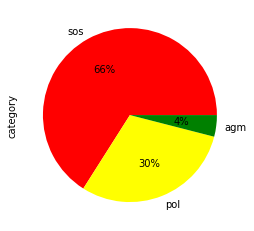

In [177]:
df_tirto.category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [0]:
tweet = df_tirto['tweet']
category = df_tirto['category']

#Preprocessing

In [0]:
import string 
import re

In [0]:
from nltk.tokenize import TweetTokenizer

In [45]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 4.7MB/s 


In [0]:
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [0]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score, make_scorer,accuracy_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [154]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
X_low = tweet.str.lower()
X_num = X_low.apply(lambda x: re.sub(r"\d+", "", str(x)))
X_sign = X_num.apply(lambda x: re.sub(r'\W', ' ', str(x)))
X_white = X_sign.str.strip()

In [0]:
tweet_tokenizer = TweetTokenizer()
tweet_tokens = X_white.apply(lambda x: tweet_tokenizer.tokenize(x))
tweet_tokens2 = tweet_tokens.apply(lambda x: [y for y in x if 'http' not in y])
tweet_tokens3 = tweet_tokens2.apply(lambda x: [y for y in x if 'pictwitter' not in y])

In [0]:
listStopword = list(stopwords.words('indonesian'))
tokens = tweet_tokens3.apply(lambda x: [w for w in x if w not in listStopword])

In [0]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for k in tokens:
    for l in k: 
      l = stemmer.stem(l)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(tokens,category,test_size=0.3)

# Modelling

In [0]:
import numpy as np

In [0]:
def identity_tokenizer(text):
    return text
    
text_clf = Pipeline([('vect', TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)),
                     ('clf', MultinomialNB()),
                     ])
tuned_parameters = {
    'vect__min_df': [5,6,7,8,9,10], 
    'vect__max_df': [0.25, 0.5, 0.75], 
    'vect__sublinear_tf': [True, False], 
    'vect__smooth_idf': [True, False],
    'vect__use_idf': [True, False], 
    'vect__analyzer': ['word', 'char', 'char_wb'], 
    'vect__norm': ['l1','l2'],
    'vect__ngram_range' : [(1, 1), (1, 2), (1, 3), (1,4), (1, 5),(1, 6)],
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__alpha': np.linspace(0.5, 1.5, 6),
    'clf__fit_prior': [True, False],  
    # 'clf__bootstrap': [True, False],
    # 'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    # 'clf__max_features': ['auto', 'sqrt'],
    # 'clf__min_samples_leaf': [1, 2, 4],
    # 'clf__min_samples_split': [2, 5, 10],
    # 'clf__n_estimators': [16, 32, 64, 128, 256]
}

In [369]:
clf = RandomizedSearchCV(text_clf, tuned_parameters, cv=5, n_iter=50,scoring=make_scorer(f1_score,average='weighted'))
clf.fit(X_train, y_train)


print(clf.best_params_)
best_clf = clf.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: expected string or bytes-like object

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: expected string or bytes-like object

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: expected string or bytes-like object

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test pa

{'vect__use_idf': True, 'vect__sublinear_tf': False, 'vect__smooth_idf': False, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 5, 'vect__max_df': 0.75, 'vect__analyzer': 'word', 'clf__fit_prior': True, 'clf__alpha': 0.9}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: expected string or bytes-like object

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: expected string or bytes-like object

  FitFailedWarning)


In [370]:
clf_score = cross_val_score(best_clf,X_train,y_train,cv=5,scoring=make_scorer(f1_score,average='weighted'))
print(f'CLF Score: {clf_score.mean()} ± {clf_score.std()}')

CLF Score: 0.7268805801890649 ± 0.07162339892111245


In [371]:
print(classification_report(y_test, best_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

         agm     0.0000    0.0000    0.0000         1
         pol     0.8889    0.5333    0.6667        15
         sos     0.7778    0.9655    0.8615        29

    accuracy                         0.8000        45
   macro avg     0.5556    0.4996    0.5094        45
weighted avg     0.7975    0.8000    0.7774        45



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [372]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
pipe = make_pipeline_imb(TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False),
                         TfidfTransformer(),
                         SMOTE(k_neighbors=3),
                         MultinomialNB())

pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test), digits=4))

              precision    recall  f1-score   support

         agm     0.3333    1.0000    0.5000         1
         pol     0.6000    0.8000    0.6857        15
         sos     0.8636    0.6552    0.7451        29

    accuracy                         0.7111        45
   macro avg     0.5990    0.8184    0.6436        45
weighted avg     0.7640    0.7111    0.7199        45



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
